<a href="https://colab.research.google.com/github/diosales/ze_delivery_trend/blob/main/Ze_Delivery_Weekday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pytrends

In [4]:
pip install requests

In [5]:
'''Importing necessary libraries
Importando as bibliotecas necessárias'''
from pytrends.request import TrendReq
import datetime
import pandas as pd
import calendar
from google.colab import data_table
import time
from numpy import random
import http.client
import json
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
from scipy.stats import anderson

In [6]:
'''Function creation block'''
'''Bloco para criação de funções'''
def xlookup(lookup_value, lookup_array, return_array, if_not_found:str = ''):

    """Searches the specificies value on an lookup array and returns the value on the return array, works like xlookup from Excel
    Procura o valor especificado na lookup array e retorna o valor na return array, funciona como o xlookup do Excel"""

    match_value = return_array.loc[lookup_array == lookup_value]
    if match_value.empty:
        return f'"{lookup_value}" not found!' if if_not_found == '' else if_not_found

    else:
        return match_value.tolist()[0]

def eta_squared(x, y):

  """Calculates the eta_squared coefficient value for 2 categories
  Calcula o valor do coeficiente eta ao quadrado para 2 categorias"""


  categorias = y.unique()
  y_means = x.mean()
  ss_total = sum((x- y_means)**2)
  ss_within = sum(sum((x[y == cat] - x[y == cat].mean())**2) for cat in categorias)

  return 1 - ss_within / ss_total

In [7]:
'''Etapa dedicada a definir o período de tempo da análise, a keyword analisada
e a realizar a requisição ao Google Trends.'''

matches_data = {'Date':[],
                "Trend Indice":[],
                "Isbiased":[]
}

df_matches = pd.DataFrame(matches_data)

df_matches.head()

season_list = [2021, 2022, 2023]
month = 1
day = 1
month_limits = []

for year in season_list:
  year_int = int(year)
  for month in range(1, 13):
    first_day_date = str(datetime.date(year_int, month, 1))
    final_month_day = calendar.monthrange(year_int, month)[1]
    last_day_date = str(datetime.date(year_int, month, final_month_day))
    month += 1
    tuple_date = (first_day_date, last_day_date)
    month_limits.append(tuple_date)


dataframes = []

for i in month_limits:
  timeframe_str = str(i[0] + " " + i[1])
  if int(timeframe_str[6]) % 4 != 0:
    '''Configurar a solicitação do Google Trends'''
    pytrends = TrendReq(hl='pt-BR', tz=360)

    '''Configurar os parâmetros da pesquisa'''
    pytrends.build_payload(
        kw_list=['zé delivery'],  '''Palavra-chave a ser pesquisada'''
        cat=0,             '''Categoria geral'''
        timeframe= timeframe_str,  '''Intervalo de tempo definido'''
        geo='BR',          '''Região: Brasil'''
        gprop=''           '''Propriedade do Google (ex: imagens, notícias, etc.)'''
    )

    '''Obter os dados de interesse ao longo do tempo'''
    '''Define um intervalo de tempo para evitar problemas com as requisições feitas ao google'''
    time.sleep(random.uniform(100, 120))
    trends_data = pytrends.interest_over_time()

    if not trends_data.empty:
      trends_data = trends_data.reset_index()
      dataframes.append(trends_data)

    if dataframes:
      df_ze_final = pd.concat(dataframes, ignore_index=True)

    print(timeframe_str)

  else:
    '''Definimos um intervalor de tempo ainda maior ao final de cada trimestre
    para evitar problemas com o numero de solicitações a API'''
    time.sleep(600)
    timeframe_str = str(i[0] + " " + i[1])
    '''Configurar a solicitação do Google Trends'''
    pytrends = TrendReq(hl='pt-BR', tz=360)

    '''Configurar os parâmetros da pesquisa'''
    pytrends.build_payload(
        kw_list=['zé delivery'],  '''Palavra-chave a ser pesquisada'''
        cat=0,             '''Categoria geral'''
        timeframe= timeframe_str,  '''Intervalo de tempo para 2023'''
        geo='BR',          '''Região: Brasil'''
        gprop=''           '''Propriedade do Google (ex: imagens, notícias, etc.)'''
    )

    '''Obter os dados de interesse ao longo do tempo'''


    time.sleep(random.uniform(100, 120))
    trends_data = pytrends.interest_over_time()

    if not trends_data.empty:
      trends_data = trends_data.reset_index()
      dataframes.append(trends_data)

    if dataframes:
      df_ze_final = pd.concat(dataframes, ignore_index=True)

    print(timeframe_str)


df_ze_final["date"] = pd.to_datetime(df_ze_final["date"])
df_ze_final["Check Fim de Semana"] = df_ze_final["date"].apply(lambda x: 1 if x.weekday() >= 4 else 0)
df_ze_final.drop(columns=["isPartial"], inplace=True)
display(df_ze_final)
'''Salvando em um excel na mesma pasta para evitar perda do dataframe'''
df_ze_final.to_excel("df_trends.xlsx")

2023-09-01 2023-09-30
2023-10-01 2023-10-31
2023-11-01 2023-11-30
2023-12-01 2023-12-31


,date,zé delivery,Check Fim de Semana
0,2023-09-01,52,0
1,2023-09-02,49,1
2,2023-09-03,43,1
3,2023-09-04,21,0
4,2023-09-05,26,0
...,...,...,...
117,2023-12-27,37,0
118,2023-12-28,43,0
119,2023-12-29,48,0
120,2023-12-30,64,1


In [7]:
'''Lendo o arquivo gerado pela busca no google trends a partir de uma nova planilha para iniciar as análises estatísticas'''
df_1 = pd.read_excel("/content/df_trends.xlsx")

df_eda = df_1.copy()
display(df_eda)
df_eda.to_excel("df_eda.xlsx")

,Unnamed: 0,date,zé delivery,Check Fim de Semana
0,0,2021-01-01,38,1
1,1,2021-01-02,64,1
2,2,2021-01-03,39,1
3,3,2021-01-04,28,0
4,4,2021-01-05,0,0
...,...,...,...,...
1090,1090,2023-12-27,37,0
1091,1091,2023-12-28,43,0
1092,1092,2023-12-29,48,1
1093,1093,2023-12-30,64,1


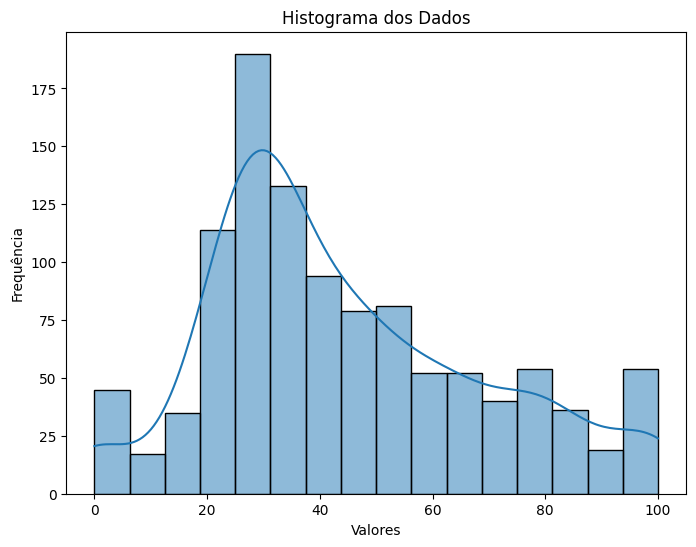

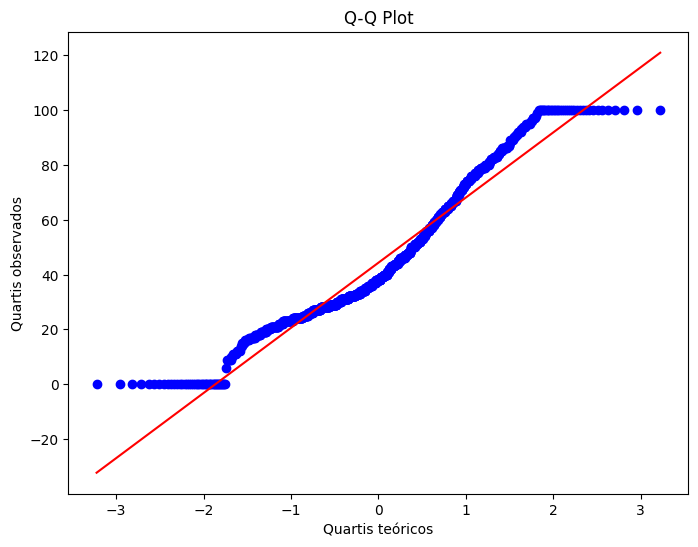

Assimetria da distribuição: 0.5737016380439044
Curtose da distribuição: 2.6778130402266527


AndersonResult(statistic=19.572900450704765, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=44.31872146118722, scale=24.314096508820985)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [8]:
'''Avaliando a normalidade do conjunto de dados'''

'''Histograma'''
plt.figure(figsize=(8, 6))
sns.histplot(df_eda["zé delivery"], kde=True)
plt.title('Histograma dos Dados')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

'''Q-Q plot'''
plt.figure(figsize=(8, 6))
stats.probplot(df_eda["zé delivery"], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Quartis teóricos')
plt.ylabel('Quartis observados')
plt.show()

print(f"Assimetria da distribuição: {skew(df_eda['zé delivery'])}")
print(f"Curtose da distribuição: {kurtosis(df_eda['zé delivery'], fisher = False)}")

anderson(df_eda["zé delivery"], "norm")

In [9]:
'''A partir da análise gráfica e análise do teste de Anderson,
concluimos que a distribuição não é suficientemente próxima de uma distribuição normal.
Portanto, vamos aplicar o teste de Kruskal Wallis para avaliar o efeito do fim de semana na tendência de busca'''

weekend_group = df_eda[df_eda["Check Fim de Semana"] == 1]
weekday_group = df_eda[df_eda["Check Fim de Semana"] == 0]

result = stats.kruskal(weekend_group["zé delivery"], weekday_group["zé delivery"])
print(result)

'''P-Valor < 0.05 é um forte indício que as duas observações são diferentes entre si, isto é: o efeito do fim de semana é real'''

KruskalResult(statistic=569.6135992103298, pvalue=6.813484785227967e-126)


'P-Valor < 0.05 é um forte indício que as duas observações são diferentes entre si, isto é: o efeito do fim de semana é real'

Média de buscas por dia (ordenada a partir de domingo):
Day Name
Saturday     73.496815
Friday       47.866242
Thursday     32.858974
Wednesday    30.788462
Tuesday      27.788462
Monday       26.653846
Sunday       70.401274
Name: zé delivery, dtype: float64


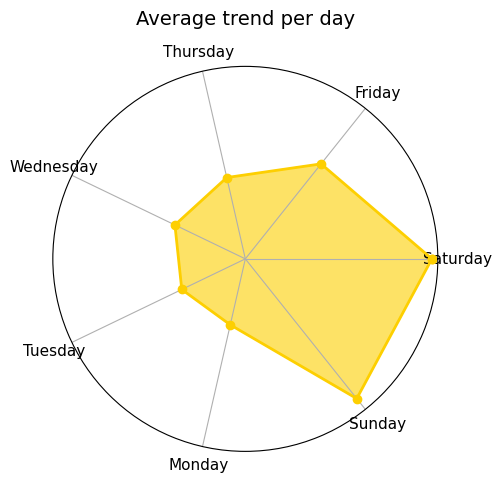

In [27]:
'''Adicionar coluna com o nome do dia da semana'''
df_eda["Day Name"] = df_eda["date"].dt.day_name()

'''Definir a ordem dos dias'''
ordered_days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

'''Calcular a média por dia da semana, reorganizando na ordem desejada'''
means_per_day = df_eda.groupby("Day Name")["zé delivery"].mean().reindex(reversed(ordered_days))

print(f"Média de buscas por dia (ordenada a partir de domingo):\n{means_per_day}")

'''Dias e valores ajustados'''
days = means_per_day.index.tolist()
values = means_per_day.values


'''Ajustes e criação do gráfico'''
values = np.append(values, values[0])
angles = np.linspace(0, 2 * np.pi, len(days), endpoint=False).tolist()
angles.append(angles[0])

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2, color='#fdcf01')
ax.fill(angles, values, alpha=0.6, color='#fdcf01')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(days, fontsize=11)


fig.patch.set_alpha(0)
ax.set_facecolor("none")

ax.set_title("Average trend per day", size=14, pad=30)
ax.set_yticks([])

plt.show()



In [103]:
'''Realização de uma regressão linear para avaliar a intensidade da influência
dos finais de semana tomando a segunda-feira como base, aqui também calculamos os
p-valores para determinar a relevância estatística'''

df_labels = pd.get_dummies(df_eda["Day Name"])
df_labels.drop(columns=['Monday'], inplace=True)
x = sm.add_constant(df_labels)
y = df_eda["zé delivery"]

model = sm.OLS(y, x.astype(float))
results = model.fit()

p_values = results.pvalues

print(p_values)
print(results.summary())


'''Os dias do fim de semana mostraram grande crescimento nos níveis de busca pelo termo
nos últimos três anos, todos com um p-valor menor que 0.05, o que aponta para a relevância estatística
do modelo utilizado'''

const         6.636872e-85
Friday        1.826546e-31
Saturday     1.589947e-120
Sunday       2.691105e-108
Thursday      4.519696e-04
Tuesday       5.201283e-01
Wednesday     1.923504e-02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            zé delivery   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     263.0
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          9.65e-208
Time:                        02:32:15   Log-Likelihood:                -4556.8
No. Observations:                1095   AIC:                             9128.
Df Residuals:                    1088   BIC:                             9163.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
      